In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
Stock = pd.read_csv('AAPL.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,6.63,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,6.67,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,6.60,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,6.45,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,6.78,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [ ]:
df_Stock.tail(5)

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,439.46,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,454.79,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,444.45,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,450.91,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04
2020-08-13,457.72,464.17,455.71,460.04,52520500,33.532634,479.279768,345.149232,452.04,437.50,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,459.63


In [ ]:
df_Stock.shape

(3732, 63)

In [ ]:
df_Stock.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

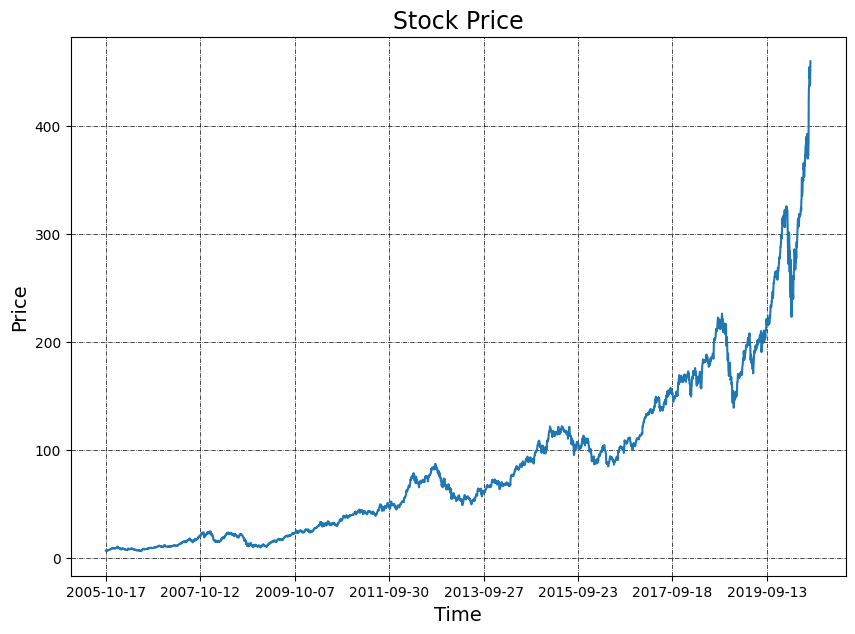

In [ ]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
df_Stock = df_Stock.drop(columns='Date_col')

In [ ]:
def create_train_test_set(df_Stock):

    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']


    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  3732
Training Set length -  3284
Validation Set length -  373
Test Set length -  74
(3284, 61) (373, 61) (75, 61)
(3284,) (373,) (75,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 8.63720886e-03  1.86051919e-01  1.55487063e-01  1.12263757e+00
  1.27287045e-10  6.75244730e-03  1.40229155e-01  1.13219366e-01
  4.25627550e-02  8.96348494e-02  1.01914953e-01  5.94183548e-02
  7.95194235e-02  7.10400007e-02  2.71425003e-01  1.26724261e-01
  8.79333155e-02 -5.87980423e-03 -3.31643393e-01 -3.31643393e-01
 -3.31643393e-01 -3.31643393e-01 -3.31643393e-01  1.88650007e+00
 -1.27270720e+00 -1.65042231e-01 -4.36658091e-04 -3.18527149e-12
 -5.07434399e-03  9.02936461e-03  5.78317106e-04  5.78317103e-04
 -5.57917772e-01 -2.02304173e-10  4.18931972e-11  1.69322438e-02
  1.61636704e-02 -1.75659582e-02  6.12165519e-03  2.15420350e-01
  1.13979655e-01 -2.41954674e-01  7.63050308e-02  3.73276597e-01
  1.22124533e-15 -5.60843989e-02  4.08788805e-02  5.13473863e-01
 -2.94431539e-02 -8.41335080e-02  5.10939135e-02 -8.14435719e-03
 -1.95035196e-02  5.67587251e-02  4.39707788e-02  1.29311738e-02
 -9.99967545e-03 -3.89778364e-03 -1.62174814e-03  1.44436900e-03
  2.83

In [ ]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9994516474373267


In [ ]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [ ]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2018-11-01 00:00:00,202.30,216.289778
1,2018-11-02 00:00:00,196.56,201.470181
2,2018-11-05 00:00:00,198.68,195.948932
3,2018-11-06 00:00:00,204.71,199.043601
4,2018-11-07 00:00:00,204.00,204.193666
...,...,...,...
368,2020-04-22 00:00:00,273.79,275.751756
369,2020-04-23 00:00:00,281.70,274.020243
370,2020-04-24 00:00:00,281.90,280.710045
371,2020-04-27 00:00:00,277.33,280.543603


<Axes: >

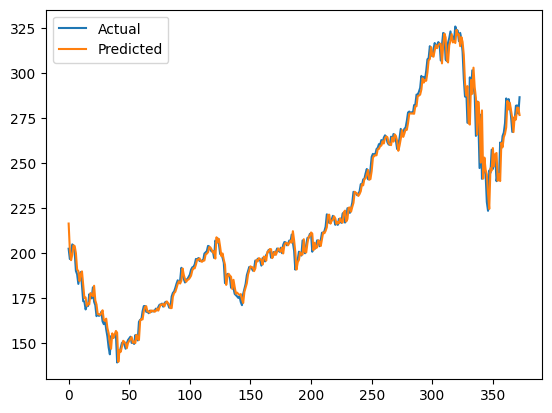

In [ ]:
df_pred[['Actual', 'Predicted']].plot()

In [ ]:
# 📈 Import metrics if not already
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 📊 Custom MAPE (already defined above)
def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ✅ Compute metrics
def evaluate_model(y_true, y_pred, label="Set"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = get_mape(y_true, y_pred)

    print(f"\n📊 Performance on {label}:")
    print(f"   R²:   {r2:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAPE: {mape:.2f}%")

# 🚀 Evaluate on all sets
evaluate_model(Y_train, Y_train_pred, "Train Set")
evaluate_model(Y_val, Y_val_pred, "Validation Set")
evaluate_model(Y_test, Y_test_pred, "Test Set")



📊 Performance on Train Set:
   R²:   0.9995
   MAE:  0.7556
   MSE:  1.4833
   RMSE: 1.2179
   MAPE: 1.45%

📊 Performance on Validation Set:
   R²:   0.9853
   MAE:  3.7458
   MSE:  34.9436
   RMSE: 5.9113
   MAPE: 1.68%

📊 Performance on Test Set:
   R²:   0.9623
   MAE:  6.4984
   MSE:  79.2137
   RMSE: 8.9002
   MAPE: 1.77%


LSTM

In [ ]:
!pip install keras-tuner tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 118.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = df_Stock.copy()
df['target'] = df['Close_forcast'].shift(-1)

df['boll_width'] = df['Upper_Band'] - df['Lower_Band']
df['boll_percent'] = (df['Close'] - df['Lower_Band']) / (df['boll_width'] + 1e-9)
df['trend_flag'] = (df['Close'] > df['Upper_Band']).astype(int)
df['ret_3d'] = df['Close'].pct_change(3)
df['ret_5d'] = df['Close'].pct_change(5)
df['qqq_return'] = df['QQQ_MA10'].pct_change()
df['snp_return'] = df['SnP_Close'].pct_change()
df['djia_return'] = df['DJIA_Close'].pct_change()

drop_cols = ['Close_forcast', 'S_Close(t-1)', 'S_Close(t-2)', 'SnP(t-1))', 'SnP(t-5)', 'DJIA(t-1))', 'DJIA(t-5)']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors='ignore')
df.dropna(inplace=True)


In [ ]:
def create_sequences(X, y, steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - steps):
        X_seq.append(X[i:i+steps])
        y_seq.append(y[i+steps])
    return np.array(X_seq), np.array(y_seq)


In [ ]:
X = df.drop(columns='target').values
y = df['target'].values.reshape(-1, 1)

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_Y.fit_transform(y)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, steps=10)

train_size = int(len(X_seq) * 0.7)
val_size = int(len(X_seq) * 0.15)

X_train, X_val, X_test = X_seq[:train_size], X_seq[train_size:train_size+val_size], X_seq[train_size+val_size:]
y_train, y_val, y_test = y_seq[:train_size], y_seq[train_size:train_size+val_size], y_seq[train_size+val_size:]


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units1', 64, 256, step=64),
                   return_sequences=True,
                   input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(hp.Float('dropout1', 0.1, 0.4, step=0.1)))

    model.add(LSTM(units=hp.Int('units2', 32, 128, step=32)))
    model.add(Dropout(hp.Float('dropout2', 0.1, 0.4, step=0.1)))

    model.add(Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('lr', [1e-3, 5e-4, 1e-4])),
        loss='mse'
    )
    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory='lstm_opt',
    project_name='stock_forecast_lstm'
)

early_stop = EarlyStopping(patience=7, restore_best_weights=True)

tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=60,
             batch_size=32,
             callbacks=[early_stop],
             verbose=1)

best_model = tuner.get_best_models(1)[0]


Trial 10 Complete [00h 00m 34s]
val_loss: 0.00022055553563404828

Best val_loss So Far: 0.0001067263146978803
Total elapsed time: 00h 07m 07s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_train_pred = scaler_Y.inverse_transform(best_model.predict(X_train))
y_val_pred   = scaler_Y.inverse_transform(best_model.predict(X_val))
y_test_pred  = scaler_Y.inverse_transform(best_model.predict(X_test))

y_train_true = scaler_Y.inverse_transform(y_train)
y_val_true   = scaler_Y.inverse_transform(y_val)
y_test_true  = scaler_Y.inverse_transform(y_test)


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
def get_mape(y_true, y_pred):
    return np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100

def evaluate_model(y_true, y_pred, label="Set"):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_true, y_pred)
    mape = get_mape(y_true, y_pred)
    print(f"\n📊 Performance on {label}:")
    print(f"   R²:   {r2:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAPE: {mape:.2f}%")


In [ ]:
evaluate_model(y_train_true, y_train_pred, "Train Set (LSTM)")
evaluate_model(y_val_true, y_val_pred, "Validation Set (LSTM)")
evaluate_model(y_test_true, y_test_pred, "Test Set (LSTM)")



📊 Performance on Train Set (LSTM):
   R²:   0.9961
   MAE:  1.5257
   RMSE: 2.0809
   MAPE: 4.62%

📊 Performance on Validation Set (LSTM):
   R²:   0.9730
   MAE:  3.4521
   RMSE: 4.6879
   MAPE: 2.62%

📊 Performance on Test Set (LSTM):
   R²:   0.8564
   MAE:  16.6151
   RMSE: 25.0098
   MAPE: 5.99%


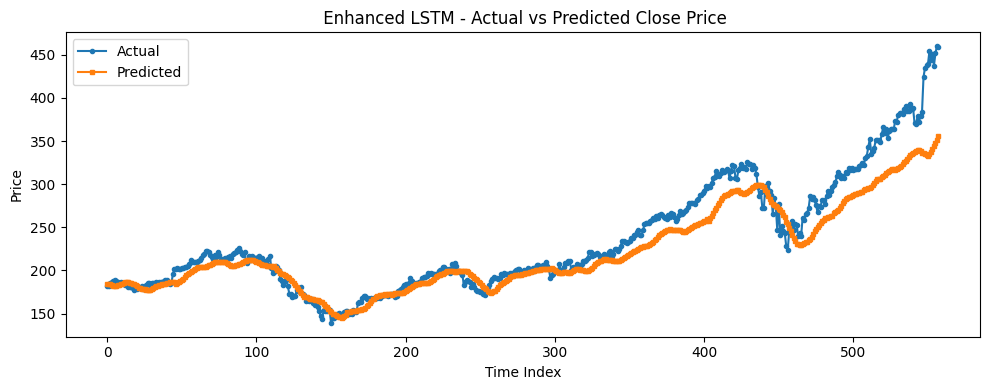

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test_true, label='Actual', marker='o', markersize=3)
plt.plot(y_test_pred, label='Predicted', marker='s', markersize=3)
plt.title(" Enhanced LSTM - Actual vs Predicted Close Price")
plt.xlabel("Time Index")
plt.ylabel("Price")

plt.legend()
plt.tight_layout()
plt.show()


TRANSFORMER

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
df = df_Stock.copy()

# 🎯 Create target: Z-score delta
rolling_mean = df['Close_forcast'].rolling(20).mean()
rolling_std = df['Close_forcast'].rolling(20).std()
df['z'] = (df['Close_forcast'] - rolling_mean) / (rolling_std + 1e-9)
df['z_delta'] = df['z'].shift(-1) - df['z']

# ✅ Add financial features
df['boll_width'] = df['Upper_Band'] - df['Lower_Band']
df['boll_percent'] = (df['Close'] - df['Lower_Band']) / (df['boll_width'] + 1e-9)
df['trend_flag'] = (df['Close'] > df['Upper_Band']).astype(int)
df['ret_3d'] = df['Close'].pct_change(3)
df['ret_5d'] = df['Close'].pct_change(5)
df['qqq_return'] = df['QQQ_MA10'].pct_change()
df['snp_return'] = df['SnP_Close'].pct_change()
df['djia_return'] = df['DJIA_Close'].pct_change()

# Drop unused/leaky cols
drop_cols = ['Close_forcast', 'S_Close(t-1)', 'S_Close(t-2)',
             'SnP(t-1))', 'SnP(t-5)', 'DJIA(t-1))', 'DJIA(t-5)']
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True, errors='ignore')

# Drop NA
df.dropna(inplace=True)


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['z', 'z_delta'])),
                         columns=df.drop(columns=['z', 'z_delta']).columns)

z_base = df['z'].shift(1).dropna().values
z_std = rolling_std.shift(1).dropna().values
z_mean = rolling_mean.shift(1).dropna().values

# Align lengths of all relevant series after dropping NaNs and shifting
min_len = min(len(df_scaled), len(df['z_delta']), len(z_base), len(z_mean), len(z_std))
df_scaled = df_scaled.iloc[-min_len:].reset_index(drop=True)
zdelta = df['z_delta'].iloc[-min_len:].reset_index(drop=True)
z_base = z_base[-min_len:]
z_mean = z_mean[-min_len:]
z_std = z_std[-min_len:]


def create_sequences(df_scaled, zdelta, z_base, z_mean, z_std, steps=30):
    X, Y, zt, zmu, zsigma = [], [], [], [], []
    # Adjust loop range to prevent index out of bounds
    for i in range(len(df_scaled) - steps):
        X.append(df_scaled.iloc[i:i+steps].values)
        Y.append(zdelta.iloc[i+steps -1]) # Adjusted index for target
        zt.append(z_base[i+steps -1]) # Adjusted index for z_base
        zmu.append(z_mean[i+steps -1]) # Adjusted index for z_mean
        zsigma.append(z_std[i+steps -1]) # Adjusted index for z_std
    return np.array(X), np.array(Y), np.array(zt), np.array(zmu), np.array(zsigma)

# Pass the adjusted zdelta series to the function
X_seq, Y_seq, zt_seq, mu_seq, std_seq = create_sequences(df_scaled, zdelta, z_base, z_mean, z_std)

In [ ]:
train_size = int(len(X_seq) * 0.7)
val_size = int(len(X_seq) * 0.15)

X_train, X_val, X_test = X_seq[:train_size], X_seq[train_size:train_size+val_size], X_seq[train_size+val_size:]
Y_train, Y_val, Y_test = Y_seq[:train_size], Y_seq[train_size:train_size+val_size], Y_seq[train_size+val_size:]
zt_test = zt_seq[-len(X_test):]
mu_test = mu_seq[-len(X_test):]
std_test = std_seq[-len(X_test):]


In [ ]:
class TransformerStock(nn.Module):
    def __init__(self, input_dim, seq_len, d_model=128, nhead=4, num_layers=3, ff_dim=256):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead,
                                                   dim_feedforward=ff_dim, dropout=0.2)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(d_model, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.input_proj(x)       # (B, T, d_model)
        x = x.permute(1, 0, 2)       # (T, B, d_model)
        x = self.encoder(x)          # (T, B, d_model)
        x = x[-1]                    # (B, d_model)
        x = self.dropout(x)
        return self.decoder(x).squeeze()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerStock(input_dim=X_train.shape[2], seq_len=X_train.shape[1]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [ ]:
train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                         torch.tensor(Y_train, dtype=torch.float32))
val_ds = TensorDataset(torch.tensor(X_val, dtype=torch.float32),
                       torch.tensor(Y_val, dtype=torch.float32))

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

best_loss = float('inf')
patience = 10
counter = 0

for epoch in range(100):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            pred = model(xb)
            val_loss += loss_fn(pred, yb).item()
    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1} | Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss:.4f}")

    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
        best_model = model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print("⏹️ Early stopping.")
            break

model.load_state_dict(best_model)
model.eval()


Epoch 1 | Train Loss: 0.5102 | Val Loss: 0.3627
Epoch 2 | Train Loss: 0.4305 | Val Loss: 0.3489
Epoch 3 | Train Loss: 0.4178 | Val Loss: 0.3504
Epoch 4 | Train Loss: 0.4026 | Val Loss: 0.3528
Epoch 5 | Train Loss: 0.3989 | Val Loss: 0.3524
Epoch 6 | Train Loss: 0.3890 | Val Loss: 0.3512
Epoch 7 | Train Loss: 0.3815 | Val Loss: 0.3521
Epoch 8 | Train Loss: 0.3888 | Val Loss: 0.3477
Epoch 9 | Train Loss: 0.3644 | Val Loss: 0.3614
Epoch 10 | Train Loss: 0.3644 | Val Loss: 0.3539
Epoch 11 | Train Loss: 0.3674 | Val Loss: 0.3707
Epoch 12 | Train Loss: 0.3655 | Val Loss: 0.3522
Epoch 13 | Train Loss: 0.3639 | Val Loss: 0.4234
Epoch 14 | Train Loss: 0.3561 | Val Loss: 0.3708
Epoch 15 | Train Loss: 0.3603 | Val Loss: 0.4196
Epoch 16 | Train Loss: 0.3596 | Val Loss: 0.4015
Epoch 17 | Train Loss: 0.3500 | Val Loss: 0.3719
Epoch 18 | Train Loss: 0.3512 | Val Loss: 0.4184
⏹️ Early stopping.


TransformerStock(
  (input_proj): Linear(in_features=63, out_features=128, bias=True)
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
        )
        (linear1): Linear(in_features=128, out_features=256, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
        (linear2): Linear(in_features=256, out_features=128, bias=True)
        (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.2, inplace=False)
        (dropout2): Dropout(p=0.2, inplace=False)
      )
    )
  )
  (decoder): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
with torch.no_grad():
    y_pred = model(torch.tensor(X_test, dtype=torch.float32).to(device)).cpu().numpy()

# Reconstruct z(t+1)
z_pred = zt_test + y_pred
z_true = zt_test + Y_test

# Reconstruct price
price_pred = z_pred * std_test + mu_test
price_true = z_true * std_test + mu_test



📊 Transformer Results:
  R²   : 0.9896
  MAE  : 4.65
  RMSE : 6.61
  MAPE : 1.87%


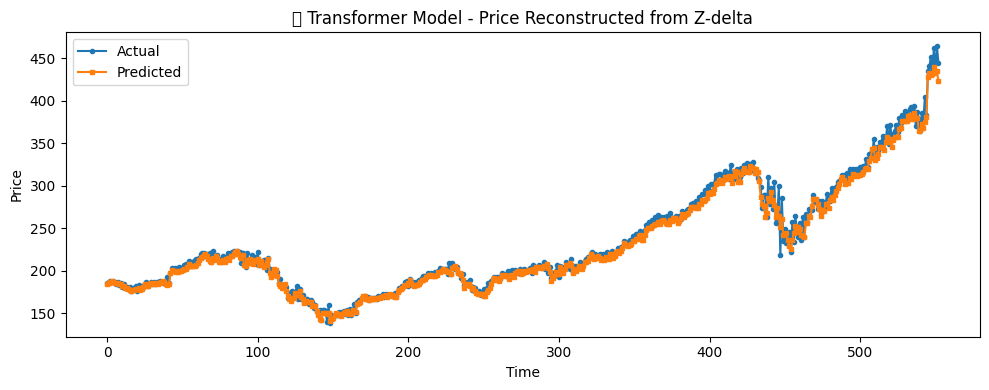

In [ ]:
def get_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate(y_true, y_pred, label="Transformer"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = get_mape(y_true, y_pred)
    print(f"\n📊 {label} Results:")
    print(f"  R²   : {r2:.4f}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  MAPE : {mape:.2f}%")

evaluate(price_true, price_pred)

plt.figure(figsize=(10, 4))
plt.plot(price_true, label='Actual', marker='o', markersize=3)
plt.plot(price_pred, label='Predicted', marker='s', markersize=3)
plt.title("Transformer Model - Price Reconstructed from Z-delta")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


XGBOOST

In [ ]:
!pip install xgboost shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = df_Stock.copy()

# Create Z-score of Close_forecast
rolling_mean = df['Close_forcast'].rolling(20).mean()
rolling_std = df['Close_forcast'].rolling(20).std()
df['z'] = (df['Close_forcast'] - rolling_mean) / (rolling_std + 1e-9)

# 🎯 Target = delta Z(t+1) - Z(t)
df['z_delta'] = df['z'].shift(-1) - df['z']

# Add engineered features
df['boll_width'] = df['Upper_Band'] - df['Lower_Band']
df['boll_percent'] = (df['Close'] - df['Lower_Band']) / (df['boll_width'] + 1e-9)
df['trend_flag'] = (df['Close'] > df['Upper_Band']).astype(int)
df['ret_3d'] = df['Close'].pct_change(3)
df['ret_5d'] = df['Close'].pct_change(5)
df['qqq_return'] = df['QQQ_MA10'].pct_change()
df['snp_return'] = df['SnP_Close'].pct_change()
df['djia_return'] = df['DJIA_Close'].pct_change()

# Drop unused/leaky cols
drop_cols = ['Close_forcast', 'S_Close(t-1)', 'S_Close(t-2)', 'SnP(t-1))', 'SnP(t-5)', 'DJIA(t-1))', 'DJIA(t-5)']
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True, errors='ignore')

df.dropna(inplace=True)


In [ ]:
X = df.drop(columns=['z', 'z_delta'])
y = df['z_delta']

# Save components to reconstruct real price
z_t = df['z'].shift(1).dropna().values
z_mu = rolling_mean.shift(1).dropna().values
z_std = rolling_std.shift(1).dropna().values

# Align lengths
min_len = min(len(X), len(y), len(z_t), len(z_mu), len(z_std))
X = X.iloc[-min_len:]
y = y.iloc[-min_len:]
z_t = z_t[-min_len:]
z_mu = z_mu[-min_len:]
z_std = z_std[-min_len:]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Save Z-components for test
z_t_test = z_t[-len(X_test):]
z_mu_test = z_mu[-len(X_test):]
z_std_test = z_std[-len(X_test):]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.03,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=1.0,
    reg_lambda=2.0,
    random_state=42,
    objective='reg:squarederror'
)

model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test_scaled)

# Predict Z(t+1)
z_pred = z_t_test + y_pred
z_true = z_t_test + y_test

# Reconstruct price = Z * σ + μ
price_pred = z_pred * z_std_test + z_mu_test
price_true = z_true * z_std_test + z_mu_test


In [ ]:
def get_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate(y_true, y_pred, label="XGB"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = get_mape(y_true, y_pred)
    print(f"\n📊 {label} Results:")
    print(f"  R²   : {r2:.4f}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  MAPE : {mape:.2f}%")

evaluate(price_true, price_pred)



📊 XGB Results:
  R²   : 0.9918
  MAE  : 3.96
  RMSE : 6.03
  MAPE : 1.48%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


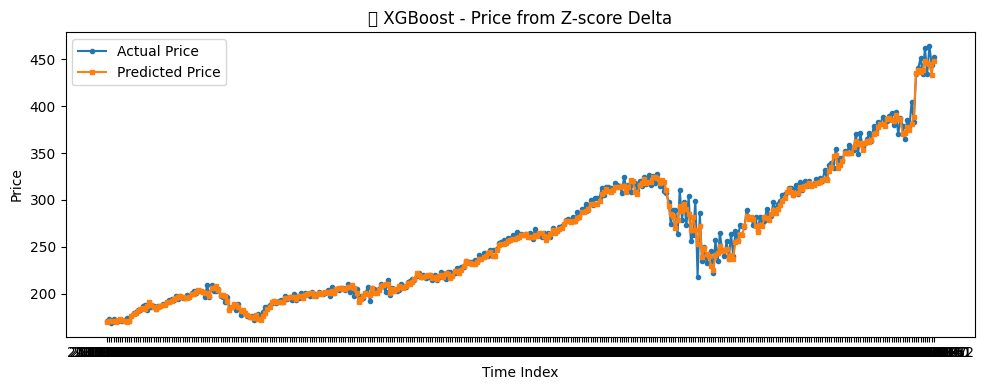

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(price_true, label='Actual Price', marker='o', markersize=3)
plt.plot(price_pred, label='Predicted Price', marker='s', markersize=3)
plt.title("XGBoost - Price from Z-score Delta")
plt.xlabel("Time Index")
plt.ylabel("Price")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train_scaled, feature_names=X.columns)

# SHAP values for test set
shap_values = explainer(X_test_scaled)


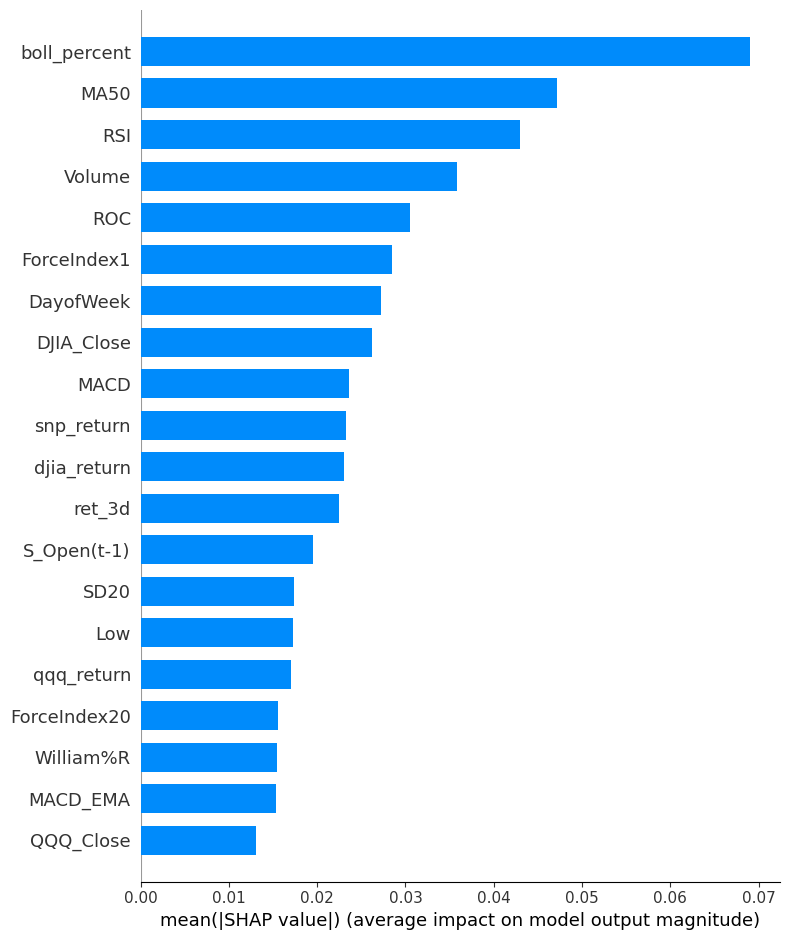

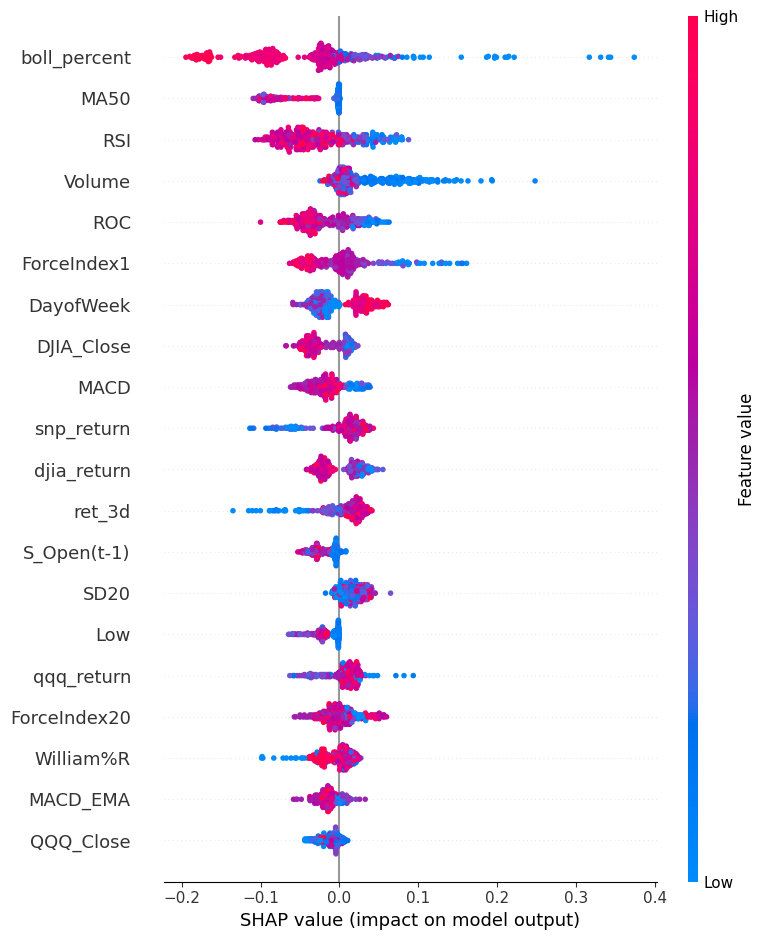

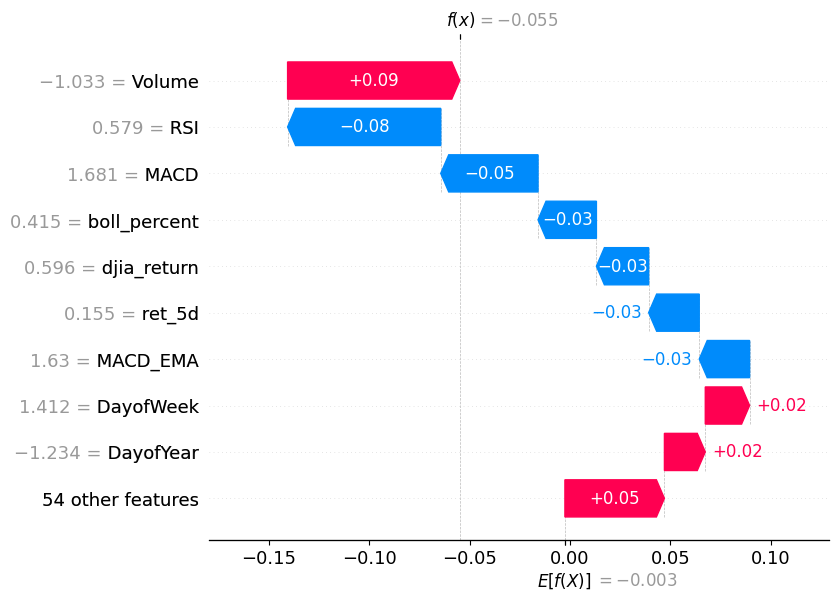

In [ ]:
# Summary bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Beeswarm plot
shap.summary_plot(shap_values, X_test)

# Waterfall for first prediction
shap.plots.waterfall(shap_values[0])

# Optional: force plot (for notebooks)
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


CNN-LSTM

In [ ]:
!pip install tensorflow scikit-learn matplotlib seaborn shap


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = df_Stock.copy()

# === Z-score normalization of Close ===
close_mean = df['Close_forcast'].rolling(window=20).mean()
close_std = df['Close_forcast'].rolling(window=20).std()
df['close_z'] = (df['Close_forcast'] - close_mean) / (close_std + 1e-9)

# === Delta Z-score (Target) ===
df['z_delta'] = df['close_z'].shift(-1) - df['close_z']

# === Features ===
df['boll_width'] = df['Upper_Band'] - df['Lower_Band']
df['boll_percent'] = (df['Close'] - df['Lower_Band']) / (df['boll_width'] + 1e-9)
df['trend_flag'] = (df['Close'] > df['Upper_Band']).astype(int)
df['ret_3d'] = df['Close'].pct_change(3)
df['ret_5d'] = df['Close'].pct_change(5)
df['qqq_return'] = df['QQQ_MA10'].pct_change()
df['snp_return'] = df['SnP_Close'].pct_change()
df['djia_return'] = df['DJIA_Close'].pct_change()

drop_cols = ['Close_forcast', 'S_Close(t-1)', 'S_Close(t-2)', 'SnP(t-1))', 'SnP(t-5)', 'DJIA(t-1))', 'DJIA(t-5)']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors='ignore')

df.dropna(inplace=True)

# Save Z components for rescaling
z_base = df['close_z'].shift(1).dropna().values  # z(t)
z_std = close_std.shift(1).dropna().values       # σ(t)
z_mean = close_mean.shift(1).dropna().values     # μ(t)


In [ ]:
y = df['z_delta']
X = df.drop(columns=['z_delta', 'close_z'])

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

def create_sequences(X, y, time_steps=10):
    Xs, ys, zs, stds, mus = [], [], [], [], []
    for i in range(len(X) - time_steps -1): # Subtract an additional 1
        Xs.append(X.iloc[i:i+time_steps].values)
        ys.append(y.iloc[i+time_steps])
        zs.append(z_base[i+time_steps])
        stds.append(z_std[i+time_steps])
        mus.append(z_mean[i+time_steps])
    return np.array(Xs), np.array(ys), np.array(zs), np.array(stds), np.array(mus)

X_seq, y_seq, z_t, zstd, zmean = create_sequences(X_scaled, y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.1, shuffle=False)
z_t_test = z_t[-len(X_test):]
zstd_test = zstd[-len(X_test):]
zmean_test = zmean[-len(X_test):]


In [ ]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    LSTM(units=64),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │         8,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,217 (161.00 KB)

 Trainable params: 41,217 (161.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - loss: 0.3837 - val_loss: 0.4459
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.3403 - val_loss: 0.4353
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3623 - val_loss: 0.4182
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.3593 - val_loss: 0.4220
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3683 - val_loss: 0.4175
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.3471 - val_loss: 0.4151
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3682 - val_loss: 0.4135
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.3794 - val_loss: 0.4136
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.3430 - val_loss: 0.4125
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3252 - val_loss: 0.4154
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.3619 - val_loss: 0.4164
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.

In [ ]:
y_pred_delta_z = model.predict(X_test).ravel()

# Predicted Z(t+1)
z_pred = z_t_test + y_pred_delta_z

# Predicted price = z_pred * σ + μ
price_pred = z_pred * zstd_test + zmean_test

# Actual price = true z(t+1) * σ + μ
z_true = z_t_test + y_test
price_true = z_true * zstd_test + zmean_test


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [ ]:
def evaluate_price(y_true, y_pred, label="CNN-LSTM (Z-Delta Reconstructed)"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"\n📊 {label} Results:")
    print(f"  R²   : {r2:.4f}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  MAPE : {mape:.2f}%")

evaluate_price(price_true, price_pred)



📊 CNN-LSTM (Z-Delta Reconstructed) Results:
  R²   : 0.9922
  MAE  : 3.70
  RMSE : 5.78
  MAPE : 1.39%


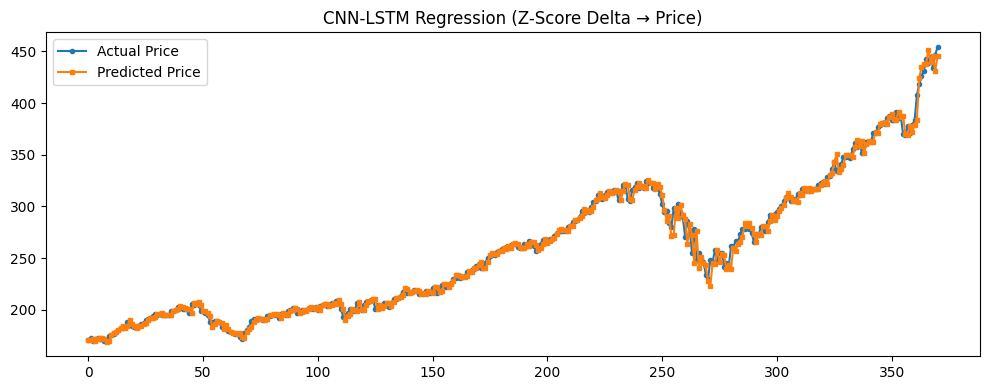

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(price_true, label='Actual Price', marker='o', markersize=3)
plt.plot(price_pred, label='Predicted Price', marker='s', markersize=3)
plt.title("CNN-LSTM Regression (Z-Score Delta → Price)")

plt.legend()
plt.tight_layout()
plt.show()


SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = df_Stock.copy()

# === Z-score normalization of Close ===
close_mean = df['Close_forcast'].rolling(window=20).mean()
close_std = df['Close_forcast'].rolling(window=20).std()
df['close_z'] = (df['Close_forcast'] - close_mean) / (close_std + 1e-9)

# === Delta Z-score (Target) ===
df['z_delta'] = df['close_z'].shift(-1) - df['close_z']

# === Feature Engineering ===
df['boll_width'] = df['Upper_Band'] - df['Lower_Band']
df['boll_percent'] = (df['Close'] - df['Lower_Band']) / (df['boll_width'] + 1e-9)
df['trend_flag'] = (df['Close'] > df['Upper_Band']).astype(int)
df['ret_3d'] = df['Close'].pct_change(3)
df['ret_5d'] = df['Close'].pct_change(5)
df['qqq_return'] = df['QQQ_MA10'].pct_change()
df['snp_return'] = df['SnP_Close'].pct_change()
df['djia_return'] = df['DJIA_Close'].pct_change()

# Drop leakage & NaNs
drop_cols = ['Close_forcast', 'S_Close(t-1)', 'S_Close(t-2)', 'SnP(t-1))', 'SnP(t-5)', 'DJIA(t-1))', 'DJIA(t-5)']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True, errors='ignore')
df.dropna(inplace=True)

# Save z(t), mean(t), std(t) for reconstruction
z_t = df['close_z'].shift(1).dropna().values
z_mean = close_mean.shift(1).dropna().values
z_std = close_std.shift(1).dropna().values


In [ ]:
y = df['z_delta']
X = df.drop(columns=['z_delta', 'close_z'])

# Scale features
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Align sizes
min_len = min(len(X_scaled), len(z_t), len(y), len(z_mean), len(z_std))
X_scaled = X_scaled.iloc[-min_len:]
y = y.iloc[-min_len:]
z_t = z_t[-min_len:]
z_mean = z_mean[-min_len:]
z_std = z_std[-min_len:]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, shuffle=False)

z_t_test = z_t[-len(X_test):]
z_mean_test = z_mean[-len(X_test):]
z_std_test = z_std[-len(X_test):]


In [ ]:
svr = SVR(kernel='rbf', C=10, epsilon=0.001, gamma='scale')
svr.fit(X_train, y_train)


SVR(C=10, epsilon=0.001)

In [ ]:
y_pred_delta_z = svr.predict(X_test)

# Z(t+1) = z(t) + delta
z_pred = z_t_test + y_pred_delta_z

# Price = Z * σ + μ
price_pred = z_pred * z_std_test + z_mean_test

# Actual target price
z_true = z_t_test + y_test
price_true = z_true * z_std_test + z_mean_test


In [ ]:
def evaluate_price(y_true, y_pred, label="SVR (Z-Delta Reconstructed)"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"\n📊 {label} Results:")
    print(f"  R²   : {r2:.4f}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  MAPE : {mape:.2f}%")

evaluate_price(price_true, price_pred)



📊 SVR (Z-Delta Reconstructed) Results:
  R²   : 0.9904
  MAE  : 4.31
  RMSE : 6.52
  MAPE : 1.60%


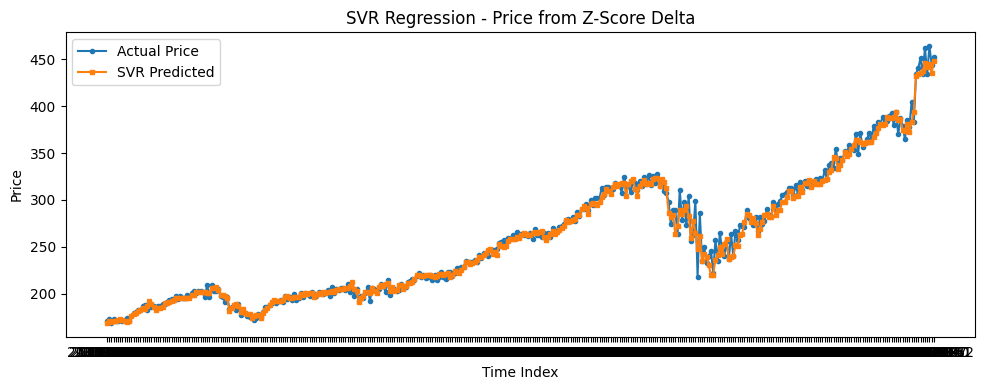

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(price_true, label='Actual Price', marker='o', markersize=3, linestyle='-')
plt.plot(price_pred, label='SVR Predicted', marker='s', markersize=3, linestyle='-')
plt.title("SVR Regression - Price from Z-Score Delta")
plt.xlabel("Time Index")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.grid(False)  # removes all lines
plt.show()

CNN

In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = df_Stock.copy()

# 🎯 Target: Z-score delta
rolling_mean = df['Close_forcast'].rolling(20).mean()
rolling_std = df['Close_forcast'].rolling(20).std()
df['z'] = (df['Close_forcast'] - rolling_mean) / (rolling_std + 1e-9)
df['z_delta'] = df['z'].shift(-1) - df['z']

# Engineered features
df['boll_width'] = df['Upper_Band'] - df['Lower_Band']
df['boll_percent'] = (df['Close'] - df['Lower_Band']) / (df['boll_width'] + 1e-9)
df['trend_flag'] = (df['Close'] > df['Upper_Band']).astype(int)
df['ret_3d'] = df['Close'].pct_change(3)
df['ret_5d'] = df['Close'].pct_change(5)
df['qqq_return'] = df['QQQ_MA10'].pct_change()
df['snp_return'] = df['SnP_Close'].pct_change()
df['djia_return'] = df['DJIA_Close'].pct_change()

drop_cols = ['Close_forcast', 'S_Close(t-1)', 'S_Close(t-2)', 'SnP(t-1))', 'SnP(t-5)', 'DJIA(t-1))', 'DJIA(t-5)']
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True, errors='ignore')
df.dropna(inplace=True)


In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df.select_dtypes(include=[np.number])),
    columns=df.select_dtypes(include=[np.number]).columns
)


# Store Z(t), μ, σ for price recovery
z_t = df['z'].shift(1).dropna().values
z_mu = rolling_mean.shift(1).dropna().values
z_std = rolling_std.shift(1).dropna().values

# Align lengths of all relevant series after dropping NaNs and shifting
min_len = min(len(df_scaled), len(df['z_delta']), len(z_t), len(z_mu), len(z_std))
df_scaled = df_scaled.iloc[-min_len:].reset_index(drop=True)
z_delta = df['z_delta'].iloc[-min_len:].reset_index(drop=True) # Align z_delta as well
z_t = z_t[-min_len:]
z_mu = z_mu[-min_len:]
z_std = z_std[-min_len:]


# Create sequences
def create_cnn_sequences(data, target, zt, mu, std, steps=10):
    X, Y, zt_list, mu_list, std_list = [], [], [], [], []
    for i in range(len(data) - steps):
        X.append(data.iloc[i:i+steps].values)
        Y.append(target.iloc[i+steps])
        zt_list.append(zt[i+steps])
        mu_list.append(mu[i+steps])
        std_list.append(std[i+steps])
    return np.array(X), np.array(Y), np.array(zt_list), np.array(mu_list), np.array(std_list)

X, y, z_base, z_mean, z_std = create_cnn_sequences(df_scaled, z_delta, z_t, z_mu, z_std)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
z_base_test = z_base[-len(X_test):]
z_mu_test = z_mean[-len(X_test):]
z_std_test = z_std[-len(X_test):]


In [ ]:
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 9, 64)          │         8,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,641 (65.00 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6310 - val_loss: 0.4275
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3656 - val_loss: 0.4193
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3586 - val_loss: 0.4113
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3419 - val_loss: 0.4132
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3550 - val_loss: 0.4137
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3457 - val_loss: 0.4111
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3524 - val_loss: 0.4283
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3209 - val_loss: 0.4150
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3431 - val_loss: 0.4052
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3279 - val_loss: 0.4140
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3262 - val_loss: 0.4493
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3361 - val_lo

In [ ]:
y_pred = model.predict(X_test).flatten()

# Predict Z(t+1)
z_pred = z_base_test + y_pred
z_true = z_base_test + y_test

# Convert back to price
price_pred = z_pred * z_std_test + z_mu_test
price_true = z_true * z_std_test + z_mu_test


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
def get_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate(y_true, y_pred, label="CNN"):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = get_mape(y_true, y_pred)
    print(f"\n📊 {label} Results:")
    print(f"  R²   : {r2:.4f}")
    print(f"  MAE  : {mae:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  MAPE : {mape:.2f}%")

evaluate(price_true, price_pred)



📊 CNN Results:
  R²   : 0.9888
  MAE  : 4.64
  RMSE : 7.06
  MAPE : 1.66%


<ipython-input-17-9fba7976eace>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


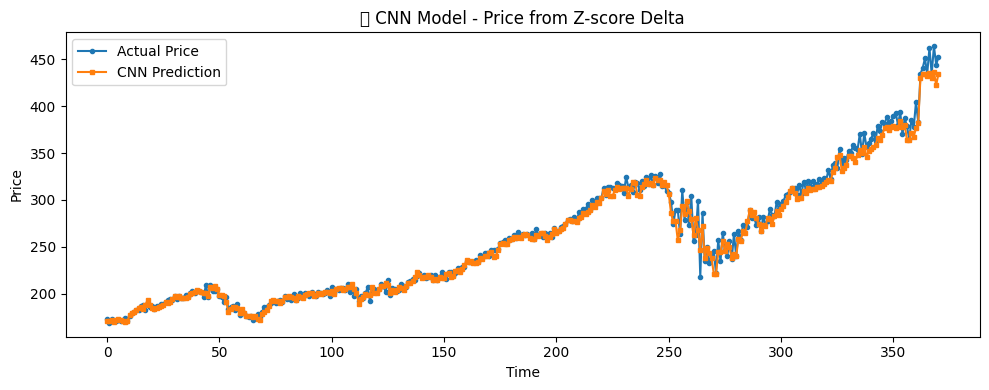

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(price_true, label='Actual Price', marker='o', markersize=3)
plt.plot(price_pred, label='CNN Prediction', marker='s', markersize=3)
plt.title("📈 CNN Model - Price from Z-score Delta")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()
